In [14]:
# Running all of the imported packages
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import PIL
# Notice that this import takes a while
# This is amplified if using a virtual environment
print("Beginning to import tensorflow...")
import tensorflow as tf
print("tensorflow has been imported.")

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

Beginning to import tensorflow...
tensorflow has been imported.


In [15]:
# Used for importing the dataset off of the web
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)

# Should print "data_dir: C:\Users\Garrett\.keras\datasets\flower_photos.tar"
print("data_dir: {}".format(data_dir))

data_dir = pathlib.Path(data_dir).with_suffix('')
# Should print "data_dir: C:\Users\Garrett\.keras\datasets\flower_photos"
print("data_dir: {}".format(data_dir))

image_data = list(data_dir.glob('*/*.jpg'))
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Number of images found: {}".format(image_count))

data_dir: C:\Users\Garrett\.keras\datasets\flower_photos.tar
data_dir: C:\Users\Garrett\.keras\datasets\flower_photos
Number of images found: 3670


In [16]:
# Sets parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

In [17]:
# Beginning the splitting
# It's good practice to use a validation split when developing your model. 
# Use 80% of the images for training and 20% for validation.
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [18]:
# Finding the class names from the training set
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Completed.


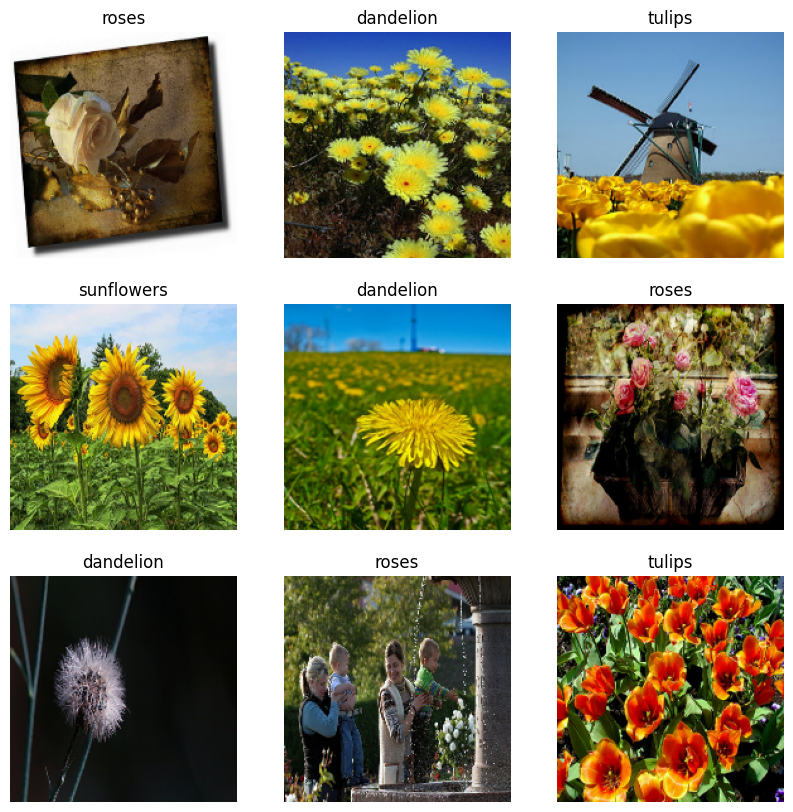

In [19]:
# Printing out a 9x9 set of images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

print("Completed.")

In [20]:
# Configuring the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Configured.")

Configured.


In [21]:
# Standardizing the data

# Changing the RGB range from [0, 255] to [0, 1] by using tf.keras.layers.Rescaling
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [22]:
# Creating the model
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
# Compiling the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
# Printing the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)       

In [25]:
# Training the model
# Trains the model for 10 epochs with the Keras Model.fit method
# This set takes a long time
# epochs=10
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

In [26]:
# Visualizing the training results
print("\nCode is commented out.\n")
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()


Code is commented out.



In [27]:
'''
End of the inital tutorial
Below this point is optimization to minimize overfitting

Data Augmentation and Dropout
'''

'\nEnd of the inital tutorial\nBelow this point is optimization to minimize overfitting\n\nData Augmentation and Dropout\n'

In [28]:
# Data augmentation; "creating" more samples to train model on

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

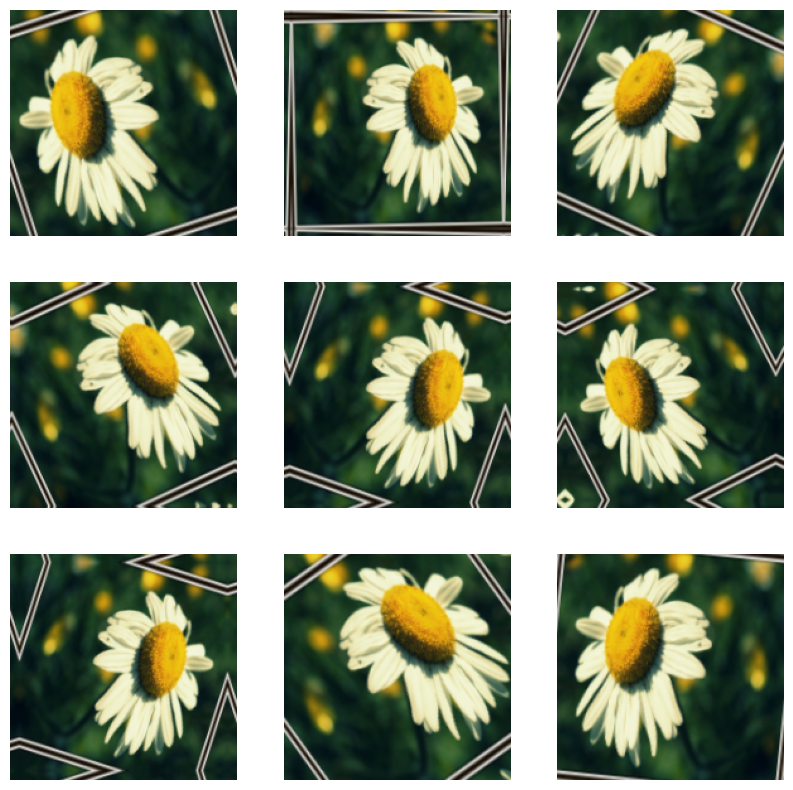

In [29]:
# Visualizing the data augmentation

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [30]:
# Adding in Dropout to a new model "drop_model"

drop_model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [31]:
# Compiling the drop_model network and training it
drop_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
     

drop_model.summary()
     

epochs = 14
history = drop_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                      

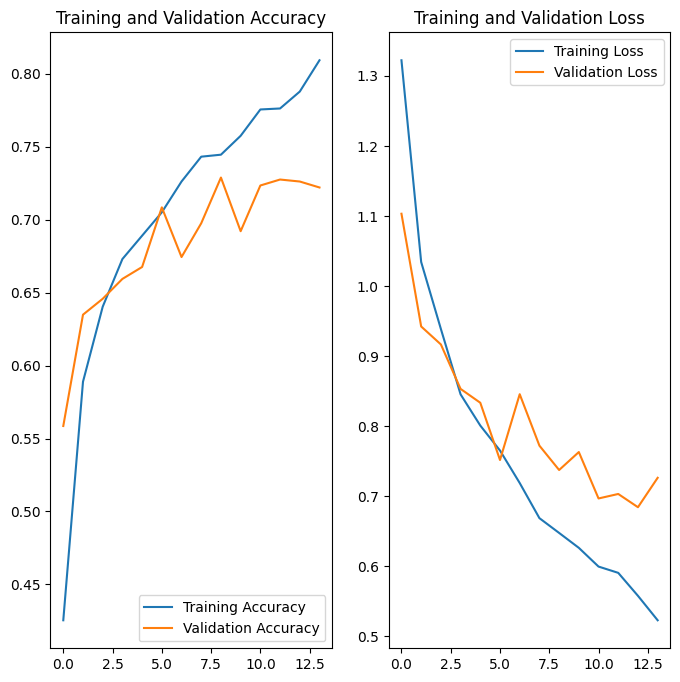

In [32]:
# Visualizing the training results of the drop_model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
# Prediction on a red sunflower using the model

sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = drop_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 508ms/step
This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [34]:
# Creating a prediction matrix
print(predictions)
print(labels)
# con_matrix = tf.math.confusion_matrix(
#     labels,
#     predictions,
#     num_classes=None,
#     weights=None,
#     dtype=tf.dtypes.int32,
#     name=None
# )

# print(con_matrix)

[[-4.4390035   0.42523432 -1.0533059   6.60114     3.8245087 ]]
tf.Tensor([2 1 4 3 1 2 1 2 4 1 4 4 3 4 1 2 0 4 1 1 1 4 3 2 3 1 4 2 2 3 4 3], shape=(32,), dtype=int32)


In [35]:
# Save the TensorFlow Lite Model to a file

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(drop_model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Garrett\AppData\Local\Temp\tmpo9rzzhx9\assets


INFO:tensorflow:Assets written to: C:\Users\Garrett\AppData\Local\Temp\tmpo9rzzhx9\assets


In [36]:
# Interpret using the TesorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.get_signature_list()


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)
     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

ValueError: Invalid Input name (sequential_3_input) for SignatureDef

In [ ]:
# Confusion matrix?
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
classes=test_ds.class_names # ordered list of class names
ytrue=[]
for images, label in test_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=model.predict(test_ds, verbose=1) # predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(y_true, y_pred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

: 

In [37]:
# Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.get_signature_list()


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)
     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

ValueError: Invalid Input name (sequential_1_input) for SignatureDef

In [38]:
# Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.get_signature_list()


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)
     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [39]:
# Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.get_signature_list()


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)
     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [40]:
# Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
# Should be "test_ds" instead of validation data
classes=val_ds.class_names # ordered list of class names
ytrue=[]
for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=model.predict(val_ds, verbose=1) # predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

ModuleNotFoundError: No module named 'seaborn'

In [41]:
# Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
# Should be "test_ds" instead of validation data
classes=val_ds.class_names # ordered list of class names
ytrue=[]
for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=model.predict(val_ds, verbose=1) # predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

23/23 [==============================] - 4s 155ms/step
there were 156 correct predictions in 734 tests for an accuracy of  21.25 % 


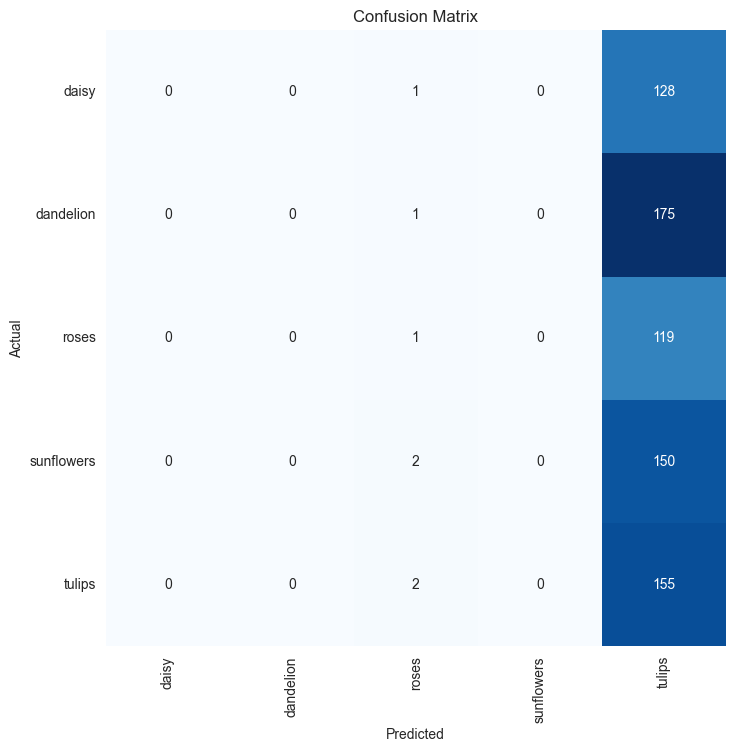

Classification Report:
----------------------
               precision    recall  f1-score   support

       daisy       0.00      0.00      0.00       129
   dandelion       0.00      0.00      0.00       176
       roses       0.14      0.01      0.02       120
  sunflowers       0.00      0.00      0.00       152
      tulips       0.21      0.99      0.35       157

    accuracy                           0.21       734
   macro avg       0.07      0.20      0.07       734
weighted avg       0.07      0.21      0.08       734



c:\cygwin64\home\Garrett\Documents\TensorFlow_ImageClassification\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\cygwin64\home\Garrett\Documents\TensorFlow_ImageClassification\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\cygwin64\home\Garrett\Documents\TensorFlow_ImageClassification\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [42]:
# Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
# Should be "test_ds" instead of validation data
classes=class_names # ordered list of class names
ytrue=[]
for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=model.predict(val_ds, verbose=1) # predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

In [43]:
# Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.get_signature_list()


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)
     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

This image most likely belongs to sunflowers with a 93.91 percent confidence.


23/23 [==============================] - 4s 165ms/step
there were 530 correct predictions in 734 tests for an accuracy of  72.21 % 


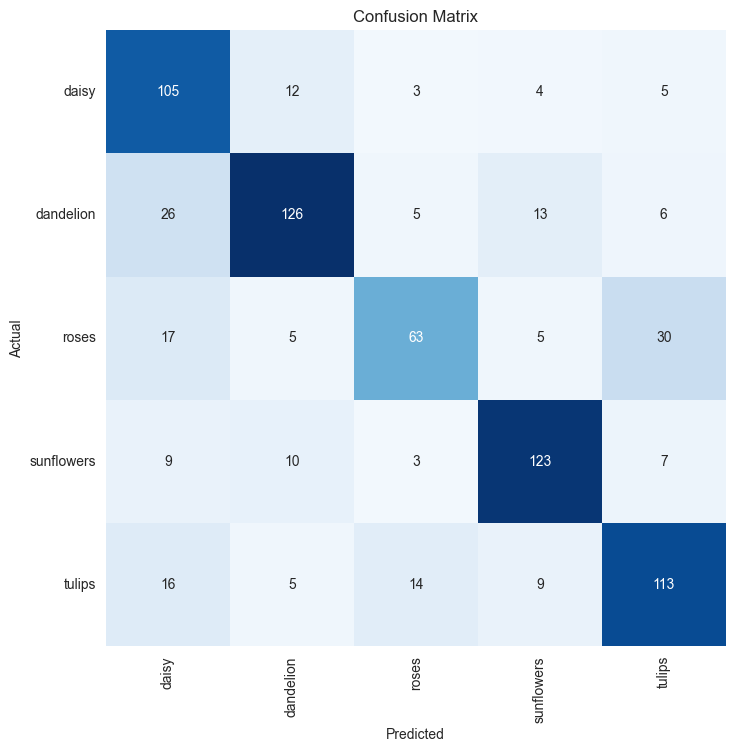

Classification Report:
----------------------
               precision    recall  f1-score   support

       daisy       0.61      0.81      0.70       129
   dandelion       0.80      0.72      0.75       176
       roses       0.72      0.53      0.61       120
  sunflowers       0.80      0.81      0.80       152
      tulips       0.70      0.72      0.71       157

    accuracy                           0.72       734
   macro avg       0.72      0.72      0.71       734
weighted avg       0.73      0.72      0.72       734



In [44]:
# Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
# Should be "test_ds" instead of validation data
classes=class_names # ordered list of class names
ytrue=[]
for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=drop_model.predict(val_ds, verbose=1) # predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

23/23 [==============================] - 4s 155ms/step
there were 530 correct predictions in 734 tests for an accuracy of  72.21 % 


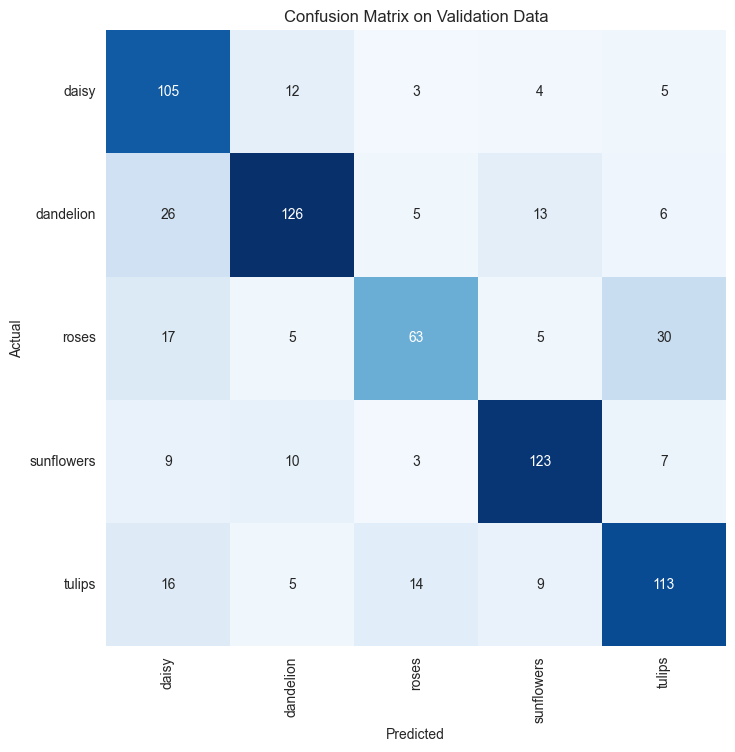

Classification Report:
----------------------
               precision    recall  f1-score   support

       daisy       0.61      0.81      0.70       129
   dandelion       0.80      0.72      0.75       176
       roses       0.72      0.53      0.61       120
  sunflowers       0.80      0.81      0.80       152
      tulips       0.70      0.72      0.71       157

    accuracy                           0.72       734
   macro avg       0.72      0.72      0.71       734
weighted avg       0.73      0.72      0.72       734



In [45]:
# Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
# Should be "test_ds" instead of validation data
classes=class_names # ordered list of class names
ytrue=[]
for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=drop_model.predict(val_ds, verbose=1) # predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

23/23 [==============================] - 4s 156ms/step
there were 530 correct predictions in 734 tests for an accuracy of  72.21 % 


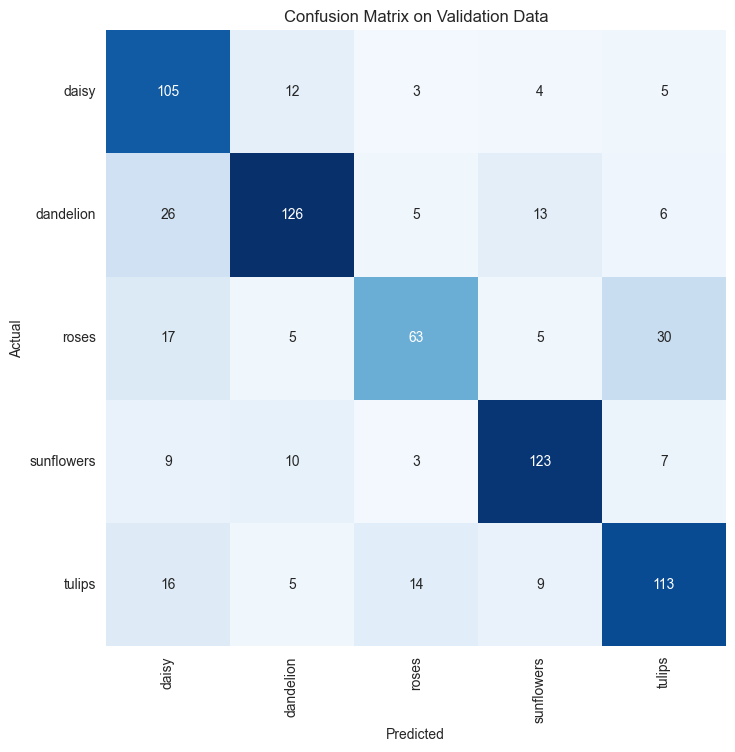

Classification Report:
----------------------
               precision    recall  f1-score   support

       daisy       0.61      0.81      0.70       129
   dandelion       0.80      0.72      0.75       176
       roses       0.72      0.53      0.61       120
  sunflowers       0.80      0.81      0.80       152
      tulips       0.70      0.72      0.71       157

    accuracy                           0.72       734
   macro avg       0.72      0.72      0.71       734
weighted avg       0.73      0.72      0.72       734



In [46]:
# Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
# Should be "test_ds" instead of validation data
classes=class_names # ordered list of class names
ytrue=[]
for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=drop_model.predict(val_ds, verbose=1) # predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

In [47]:
# Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.get_signature_list()


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)
     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [48]:
# Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=classify_lite(sequential_2_input=val_ds)['outputs']# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

AttributeError: '_PrefetchDataset' object has no attribute 'shape'

In [49]:
# Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=classify_lite(sequential_2_input=val_ds)['outputs']# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

AttributeError: '_PrefetchDataset' object has no attribute 'shape'

In [50]:
# Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.get_signature_list()


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
  except:
    predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']

score_lite = tf.nn.softmax(predictions_lite)
     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [51]:
# Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.get_signature_list()


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
  except:
    predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']

score_lite = tf.nn.softmax(predictions_lite)
     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [52]:
# Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.get_signature_list()


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
  except:
    predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']

score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

score_lite: tf.Tensor([[1.5067860e-05 1.9523822e-03 4.4508342e-04 9.3912876e-01 5.8458798e-02]], shape=(1, 5), dtype=float32)
This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [53]:
# Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= tf.nn.softmax(predictions_lite)# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

there were 0 correct predictions in 1 tests for an accuracy of   0.00 % 


ValueError: Found input variables with inconsistent numbers of samples: [734, 1]

23/23 [==============================] - 5s 223ms/step
there were 530 correct predictions in 734 tests for an accuracy of  72.21 % 


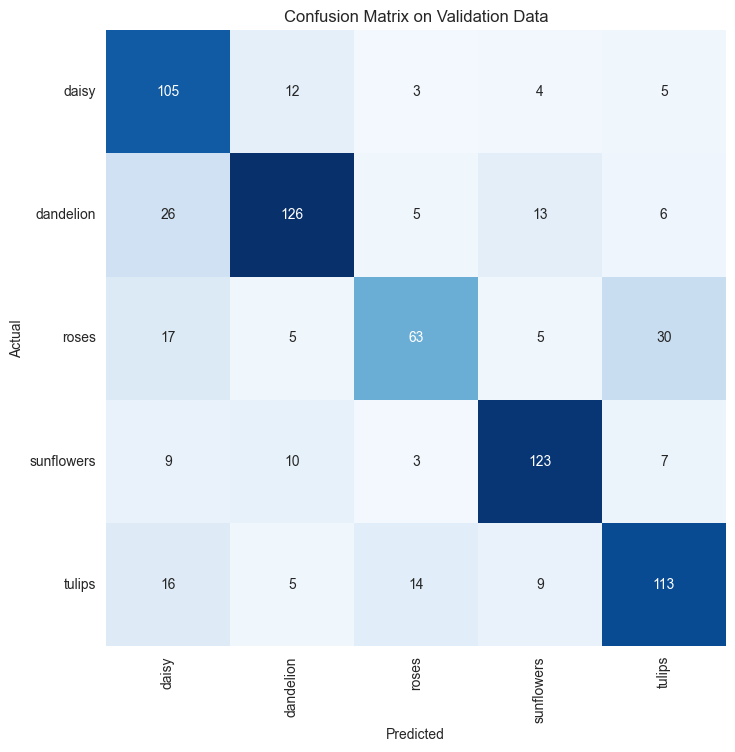

Classification Report:
----------------------
               precision    recall  f1-score   support

       daisy       0.61      0.81      0.70       129
   dandelion       0.80      0.72      0.75       176
       roses       0.72      0.53      0.61       120
  sunflowers       0.80      0.81      0.80       152
      tulips       0.70      0.72      0.71       157

    accuracy                           0.72       734
   macro avg       0.72      0.72      0.71       734
weighted avg       0.73      0.72      0.72       734



In [54]:
# Previous version of Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
# Should be "test_ds" instead of validation data
classes=class_names # ordered list of class names
ytrue=[]
for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=drop_model.predict(val_ds, verbose=1) # predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

In [55]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
interpreter.get_signature_list()


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=val_ds)['outputs']
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=val_ds)['outputs']
  except:
    predictions_lite = classify_lite(sequential_3_input=val_ds)['outputs']

score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

ValueError: Invalid Input name (sequential_3_input) for SignatureDef

In [56]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
print(interpreter.get_signature_list())


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=val_ds)['outputs']
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=val_ds)['outputs']
  except:
    predictions_lite = classify_lite(sequential_3_input=val_ds)['outputs']

score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

{'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}


ValueError: Invalid Input name (sequential_3_input) for SignatureDef

In [57]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
  except:
    predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']

score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
score_lite: tf.Tensor([[1.5067860e-05 1.9523822e-03 4.4508342e-04 9.3912876e-01 5.8458798e-02]], shape=(1, 5), dtype=float32)
This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [58]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
  print("sequential_1_input chosen")
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
    print("sequential_2_input chosen")
  except:
    predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']
    print("sequential_3_input chosen")

score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
sequential_2_input chosen
score_lite: tf.Tensor([[1.5067860e-05 1.9523822e-03 4.4508342e-04 9.3912876e-01 5.8458798e-02]], shape=(1, 5), dtype=float32)
This image most likely belongs to sunflowers with a 93.91 percent confidence.


23/23 [==============================] - 5s 202ms/step
there were 530 correct predictions in 734 tests for an accuracy of  72.21 % 


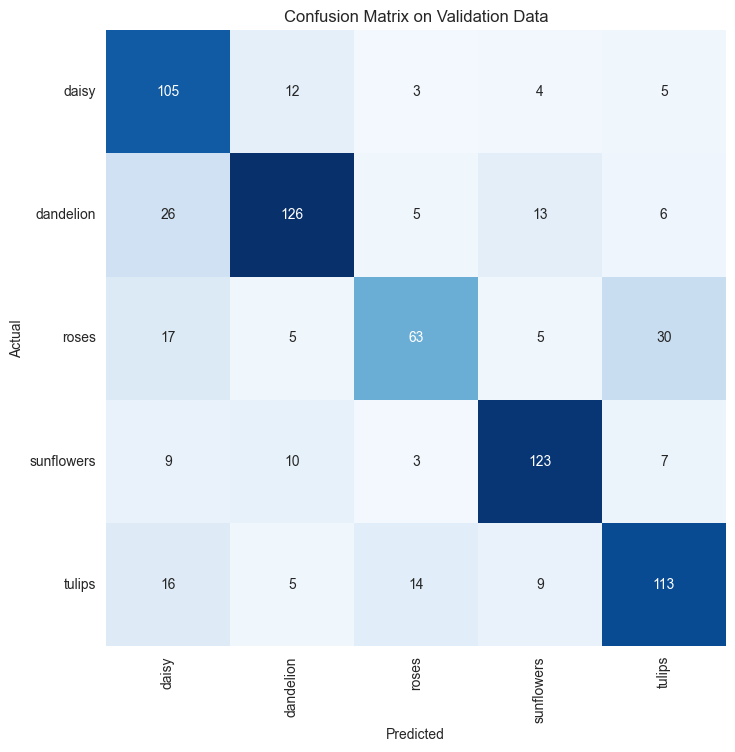

Classification Report:
----------------------
               precision    recall  f1-score   support

       daisy       0.61      0.81      0.70       129
   dandelion       0.80      0.72      0.75       176
       roses       0.72      0.53      0.61       120
  sunflowers       0.80      0.81      0.80       152
      tulips       0.70      0.72      0.71       157

    accuracy                           0.72       734
   macro avg       0.72      0.72      0.71       734
weighted avg       0.73      0.72      0.72       734



In [59]:
# Previous version of Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
# Should be "test_ds" instead of validation data
classes=class_names # ordered list of class names
ytrue=[]
for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=drop_model.predict(val_ds, verbose=1) # predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

In [60]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
  print("sequential_1_input chosen")
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
    print("sequential_2_input chosen")
  except:
    predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']
    print("sequential_3_input chosen")

score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)     

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
sequential_2_input chosen
score_lite: tf.Tensor([[1.5067860e-05 1.9523822e-03 4.4508342e-04 9.3912876e-01 5.8458798e-02]], shape=(1, 5), dtype=float32)
This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [61]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# In case the sequential number changes, this handles it
predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
  print("sequential_1_input chosen")
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
    print("sequential_2_input chosen")
  except:
    predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']
    print("sequential_3_input chosen")

score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)   

table_score = []
for i in range(0,10):
   table_score.append(score_lite)
  

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
sequential_2_input chosen
score_lite: tf.Tensor([[1.5067860e-05 1.9523822e-03 4.4508342e-04 9.3912876e-01 5.8458798e-02]], shape=(1, 5), dtype=float32)
This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [62]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= table_score# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

there were 2 correct predictions in 10 tests for an accuracy of  20.00 % 


ValueError: Found input variables with inconsistent numbers of samples: [734, 10]

In [63]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# In case the sequential number changes, this handles it
predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
  print("sequential_1_input chosen")
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
    print("sequential_2_input chosen")
  except:
    predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']
    print("sequential_3_input chosen")

score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)   

table_score = []
for i in range(0,len(val_ds)):
   table_score.append(score_lite)
  

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
sequential_2_input chosen
score_lite: tf.Tensor([[1.5067860e-05 1.9523822e-03 4.4508342e-04 9.3912876e-01 5.8458798e-02]], shape=(1, 5), dtype=float32)
This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [64]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= table_score# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

there were 5 correct predictions in 23 tests for an accuracy of  21.74 % 


ValueError: Found input variables with inconsistent numbers of samples: [734, 23]

In [65]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# In case the sequential number changes, this handles it
predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
  print("sequential_1_input chosen")
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
    print("sequential_2_input chosen")
  except:
    predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']
    print("sequential_3_input chosen")

score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)   

table_score = []
for i in range(0,734):
   table_score.append(score_lite)
  

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
sequential_2_input chosen
score_lite: tf.Tensor([[1.5067860e-05 1.9523822e-03 4.4508342e-04 9.3912876e-01 5.8458798e-02]], shape=(1, 5), dtype=float32)
This image most likely belongs to sunflowers with a 93.91 percent confidence.


there were 152 correct predictions in 734 tests for an accuracy of  20.71 % 


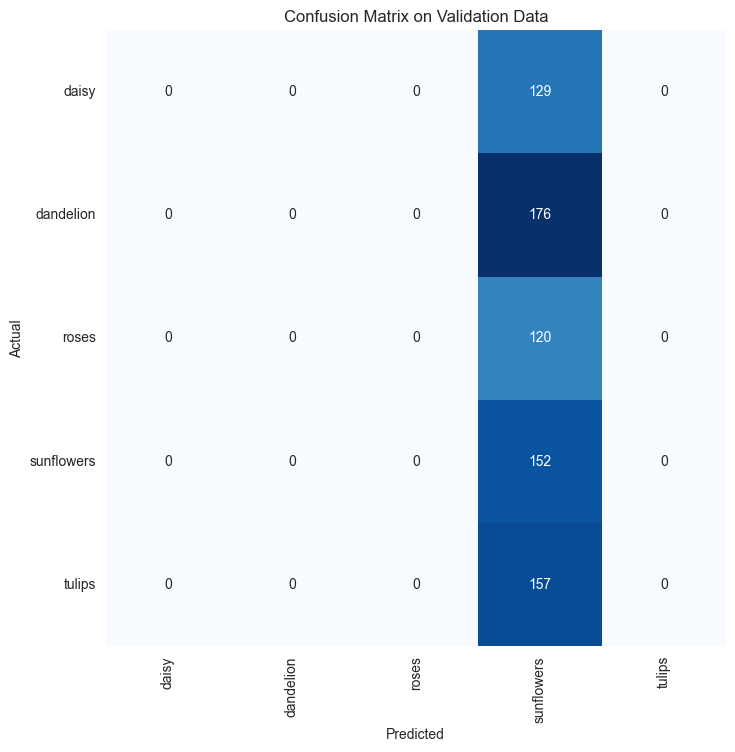

Classification Report:
----------------------
               precision    recall  f1-score   support

       daisy       0.00      0.00      0.00       129
   dandelion       0.00      0.00      0.00       176
       roses       0.00      0.00      0.00       120
  sunflowers       0.21      1.00      0.34       152
      tulips       0.00      0.00      0.00       157

    accuracy                           0.21       734
   macro avg       0.04      0.20      0.07       734
weighted avg       0.04      0.21      0.07       734



c:\cygwin64\home\Garrett\Documents\TensorFlow_ImageClassification\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\cygwin64\home\Garrett\Documents\TensorFlow_ImageClassification\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\cygwin64\home\Garrett\Documents\TensorFlow_ImageClassification\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [66]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= table_score# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

In [67]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# In case the sequential number changes, this handles it
predictions_lite = None
try:
  predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
  print("sequential_1_input chosen")
except:
  try:
    predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
    print("sequential_2_input chosen")
  except:
    predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']
    print("sequential_3_input chosen")

score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)   

table_score = []
for i in range(0,734):
   table_score.append(score_lite)
  

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
sequential_2_input chosen
score_lite: tf.Tensor([[1.5067860e-05 1.9523822e-03 4.4508342e-04 9.3912876e-01 5.8458798e-02]], shape=(1, 5), dtype=float32)
This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [68]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# In case the sequential number changes, this handles it
predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']


score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)   

table_score = []
for images in val_ds:
   table_score.append(score_lite)
  

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
score_lite: tf.Tensor([[1.5067860e-05 1.9523822e-03 4.4508342e-04 9.3912876e-01 5.8458798e-02]], shape=(1, 5), dtype=float32)
This image most likely belongs to sunflowers with a 93.91 percent confidence.


In [69]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= table_score# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

there were 5 correct predictions in 23 tests for an accuracy of  21.74 % 


ValueError: Found input variables with inconsistent numbers of samples: [734, 23]

In [70]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        print("e: ", e, " label: ", label)
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= table_score# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

e:  tf.Tensor(0, shape=(), dtype=int32)  label:  tf.Tensor([0 4 3 0 3 4 1 2 4 0 0 0 4 4 4 3 3 0 0 3 1 4 4 2 3 3 1 2 1 2 4 1], shape=(32,), dtype=int32)
e:  tf.Tensor(4, shape=(), dtype=int32)  label:  tf.Tensor([0 4 3 0 3 4 1 2 4 0 0 0 4 4 4 3 3 0 0 3 1 4 4 2 3 3 1 2 1 2 4 1], shape=(32,), dtype=int32)
e:  tf.Tensor(3, shape=(), dtype=int32)  label:  tf.Tensor([0 4 3 0 3 4 1 2 4 0 0 0 4 4 4 3 3 0 0 3 1 4 4 2 3 3 1 2 1 2 4 1], shape=(32,), dtype=int32)
e:  tf.Tensor(0, shape=(), dtype=int32)  label:  tf.Tensor([0 4 3 0 3 4 1 2 4 0 0 0 4 4 4 3 3 0 0 3 1 4 4 2 3 3 1 2 1 2 4 1], shape=(32,), dtype=int32)
e:  tf.Tensor(3, shape=(), dtype=int32)  label:  tf.Tensor([0 4 3 0 3 4 1 2 4 0 0 0 4 4 4 3 3 0 0 3 1 4 4 2 3 3 1 2 1 2 4 1], shape=(32,), dtype=int32)
e:  tf.Tensor(4, shape=(), dtype=int32)  label:  tf.Tensor([0 4 3 0 3 4 1 2 4 0 0 0 4 4 4 3 3 0 0 3 1 4 4 2 3 3 1 2 1 2 4 1], shape=(32,), dtype=int32)
e:  tf.Tensor(1, shape=(), dtype=int32)  label:  tf.Tensor([0 4 3 0 3 4 1 2 4 0 0 0 4 4 

ValueError: Found input variables with inconsistent numbers of samples: [734, 23]

In [71]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# In case the sequential number changes, this handles it
predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']


score_lite = tf.nn.softmax(predictions_lite)
print("score_lite:", score_lite)   

table_score = []
for images, label in val_ds:   
    for e in label:
      table_score.append(score_lite)
  

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
score_lite: tf.Tensor([[1.5067860e-05 1.9523822e-03 4.4508342e-04 9.3912876e-01 5.8458798e-02]], shape=(1, 5), dtype=float32)
This image most likely belongs to sunflowers with a 93.91 percent confidence.


there were 152 correct predictions in 734 tests for an accuracy of  20.71 % 


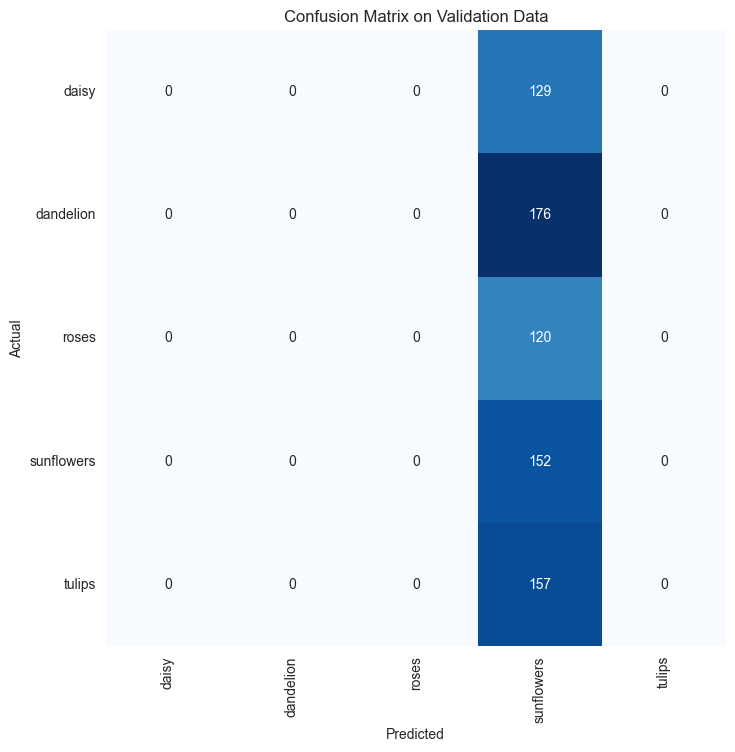

Classification Report:
----------------------
               precision    recall  f1-score   support

       daisy       0.00      0.00      0.00       129
   dandelion       0.00      0.00      0.00       176
       roses       0.00      0.00      0.00       120
  sunflowers       0.21      1.00      0.34       152
      tulips       0.00      0.00      0.00       157

    accuracy                           0.21       734
   macro avg       0.04      0.20      0.07       734
weighted avg       0.04      0.21      0.07       734



c:\cygwin64\home\Garrett\Documents\TensorFlow_ImageClassification\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\cygwin64\home\Garrett\Documents\TensorFlow_ImageClassification\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\cygwin64\home\Garrett\Documents\TensorFlow_ImageClassification\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [72]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        #print("e: ", e, " label: ", label)
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= table_score# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

In [75]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
count = 0
table_score = []
for images, label in val_ds:   
    for e in label:
      # In case the sequential number changes, this handles it
      predictions_lite = classify_lite(sequential_2_input=images)['outputs']


      score_lite = tf.nn.softmax(predictions_lite)
      print("count: ", count)  
      count = count + 1

      table_score.append(score_lite)
  

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
count:  0
count:  1
count:  2
count:  3
count:  4
count:  5
count:  6
count:  7
count:  8
count:  9
count:  10
count:  11
count:  12
count:  13
count:  14
count:  15
count:  16
count:  17
count:  18
count:  19
count:  20
count:  21
count:  22
count:  23
count:  24
count:  25
count:  26
count:  27
count:  28
count:  29
count:  30
count:  31
count:  32
count:  33
count:  34
count:  35
count:  36
count:  37
count:  38
count:  39
count:  40
count:  41
count:  42
count:  43
count:  44
count:  45
count:  46
count:  47
count:  48
count:  49
count:  50
count:  51
count:  52
count:  53
count:  54
count:  55
count:  56
count:  57
count:  58
count:  59
count:  60
count:  61
count:  62
count:  63
count:  64
count:  65
count:  66
count:  67
count:  68
count:  69
count:  70
count:  71
count:  72
count:  73
count:  74
count:  75
count:  76
count:  77
count:  78
count:  79
count:  80
count:  81
count:  82
count:

IndexError: list index out of range

In [76]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
count = 0
table_score = []
for images, label in val_ds:   
    for e in label:
      # In case the sequential number changes, this handles it
      predictions_lite = classify_lite(sequential_2_input=images)['outputs']


      score_lite = tf.nn.softmax(predictions_lite)
      print("count: ", count)  
      count = count + 1

      table_score.append(score_lite)
  

#print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)
# print(np.max(np.abs(predictions - predictions_lite)))  

SyntaxError: unmatched ')' (<ipython-input-76-6b481649ca77>, line 39)

In [77]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
count = 0
table_score = []
for images, label in val_ds:   
    for e in label:
      # In case the sequential number changes, this handles it
      predictions_lite = classify_lite(sequential_2_input=images)['outputs']


      score_lite = tf.nn.softmax(predictions_lite)
      print("count: ", count)  
      count = count + 1

      table_score.append(score_lite)
  

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
count:  0
count:  1
count:  2
count:  3
count:  4
count:  5
count:  6
count:  7
count:  8
count:  9
count:  10
count:  11
count:  12
count:  13
count:  14
count:  15
count:  16
count:  17
count:  18
count:  19
count:  20
count:  21
count:  22
count:  23
count:  24
count:  25
count:  26
count:  27
count:  28
count:  29
count:  30
count:  31
count:  32
count:  33
count:  34
count:  35
count:  36
count:  37
count:  38
count:  39
count:  40
count:  41
count:  42
count:  43
count:  44
count:  45
count:  46
count:  47
count:  48
count:  49
count:  50
count:  51
count:  52
count:  53
count:  54
count:  55
count:  56
count:  57
count:  58
count:  59
count:  60
count:  61
count:  62
count:  63
count:  64
count:  65
count:  66
count:  67
count:  68
count:  69
count:  70
count:  71
count:  72
count:  73
count:  74
count:  75
count:  76
count:  77
count:  78
count:  79
count:  80
count:  81
count:  82
count:

In [78]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        #print("e: ", e, " label: ", label)
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= table_score# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

IndexError: list index out of range

23/23 [==============================] - 4s 176ms/step
there were 530 correct predictions in 734 tests for an accuracy of  72.21 % 


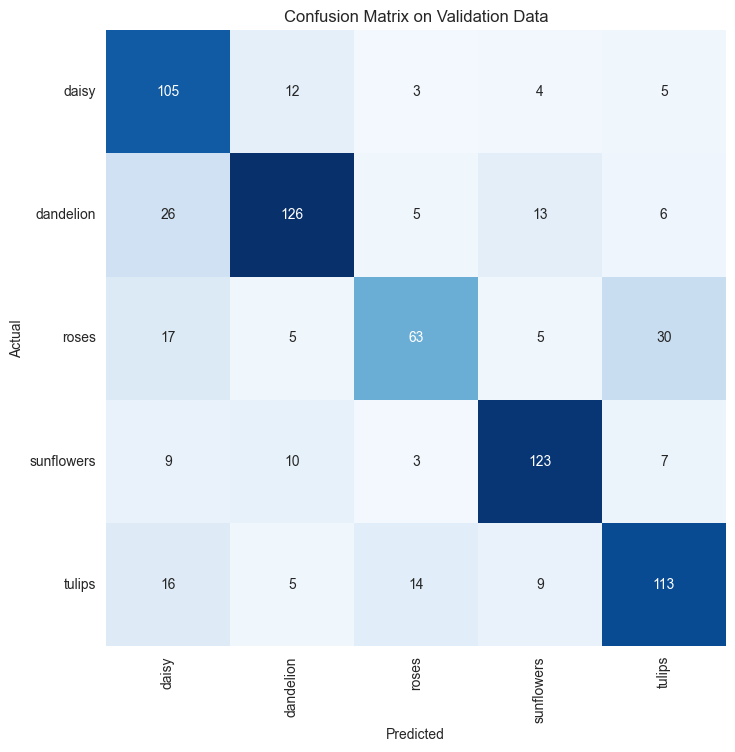

Classification Report:
----------------------
               precision    recall  f1-score   support

       daisy       0.61      0.81      0.70       129
   dandelion       0.80      0.72      0.75       176
       roses       0.72      0.53      0.61       120
  sunflowers       0.80      0.81      0.80       152
      tulips       0.70      0.72      0.71       157

    accuracy                           0.72       734
   macro avg       0.72      0.72      0.71       734
weighted avg       0.73      0.72      0.72       734



In [79]:
# Previous version of Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
# Should be "test_ds" instead of validation data
classes=class_names # ordered list of class names
ytrue=[]
for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=drop_model.predict(val_ds, verbose=1) # predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 

In [80]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
# count = 0
# table_score = []
# for images, label in val_ds:   
#     for e in label:
#       # In case the sequential number changes, this handles it
#       predictions_lite = classify_lite(sequential_2_input=images)['outputs']


#       score_lite = tf.nn.softmax(predictions_lite)
#       print("count: ", count)  
#       count = count + 1

#       table_score.append(score_lite)
predictions_lite = classify_lite(sequential_2_input=images)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

count = 0
table_score = []
for images, label in val_ds:   
    for e in label:
      # In case the sequential number changes, this handles it
      
      print("count: ", count)  
      count = count + 1

      table_score.append(score_lite)

  

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
count:  0
count:  1
count:  2
count:  3
count:  4
count:  5
count:  6
count:  7
count:  8
count:  9
count:  10
count:  11
count:  12
count:  13
count:  14
count:  15
count:  16
count:  17
count:  18
count:  19
count:  20
count:  21
count:  22
count:  23
count:  24
count:  25
count:  26
count:  27
count:  28
count:  29
count:  30
count:  31
count:  32
count:  33
count:  34
count:  35
count:  36
count:  37
count:  38
count:  39
count:  40
count:  41
count:  42
count:  43
count:  44
count:  45
count:  46
count:  47
count:  48
count:  49
count:  50
count:  51
count:  52
count:  53
count:  54
count:  55
count:  56
count:  57
count:  58
count:  59
count:  60
count:  61
count:  62
count:  63
count:  64
count:  65
count:  66
count:  67
count:  68
count:  69
count:  70
count:  71
count:  72
count:  73
count:  74
count:  75
count:  76
count:  77
count:  78
count:  79
count:  80
count:  81
count:  82
count:

In [81]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
# count = 0
# table_score = []
# for images, label in val_ds:   
#     for e in label:
#       # In case the sequential number changes, this handles it
#       predictions_lite = classify_lite(sequential_2_input=images)['outputs']


#       score_lite = tf.nn.softmax(predictions_lite)
#       print("count: ", count)  
#       count = count + 1

#       table_score.append(score_lite)
predictions_lite = classify_lite(sequential_2_input=images)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

count = 0
table_score = []
for images, label in val_ds:   
    for e in label:
      # In case the sequential number changes, this handles it
      
      print("count: ", count)  
      count = count + 1

      table_score.append(score_lite)

  

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
count:  0
count:  1
count:  2
count:  3
count:  4
count:  5
count:  6
count:  7
count:  8
count:  9
count:  10
count:  11
count:  12
count:  13
count:  14
count:  15
count:  16
count:  17
count:  18
count:  19
count:  20
count:  21
count:  22
count:  23
count:  24
count:  25
count:  26
count:  27
count:  28
count:  29
count:  30
count:  31
count:  32
count:  33
count:  34
count:  35
count:  36
count:  37
count:  38
count:  39
count:  40
count:  41
count:  42
count:  43
count:  44
count:  45
count:  46
count:  47
count:  48
count:  49
count:  50
count:  51
count:  52
count:  53
count:  54
count:  55
count:  56
count:  57
count:  58
count:  59
count:  60
count:  61
count:  62
count:  63
count:  64
count:  65
count:  66
count:  67
count:  68
count:  69
count:  70
count:  71
count:  72
count:  73
count:  74
count:  75
count:  76
count:  77
count:  78
count:  79
count:  80
count:  81
count:  82
count:

In [83]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
# count = 0
# table_score = []
# for images, label in val_ds:   
#     for e in label:
#       # In case the sequential number changes, this handles it
#       predictions_lite = classify_lite(sequential_2_input=images)['outputs']


#       score_lite = tf.nn.softmax(predictions_lite)
#       print("count: ", count)  
#       count = count + 1

#       table_score.append(score_lite)
predictions_lite = classify_lite(sequential_2_input=images)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

count = 0
table_score = []
for images, label in val_ds:   
    for e in label:
      # In case the sequential number changes, this handles it
      
      print("count: ", count)  
      count = count + 1

      table_score.append(score_lite)

print("table_score: ", table_score)

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
count:  0
count:  1
count:  2
count:  3
count:  4
count:  5
count:  6
count:  7
count:  8
count:  9
count:  10
count:  11
count:  12
count:  13
count:  14
count:  15
count:  16
count:  17
count:  18
count:  19
count:  20
count:  21
count:  22
count:  23
count:  24
count:  25
count:  26
count:  27
count:  28
count:  29
count:  30
count:  31
count:  32
count:  33
count:  34
count:  35
count:  36
count:  37
count:  38
count:  39
count:  40
count:  41
count:  42
count:  43
count:  44
count:  45
count:  46
count:  47
count:  48
count:  49
count:  50
count:  51
count:  52
count:  53
count:  54
count:  55
count:  56
count:  57
count:  58
count:  59
count:  60
count:  61
count:  62
count:  63
count:  64
count:  65
count:  66
count:  67
count:  68
count:  69
count:  70
count:  71
count:  72
count:  73
count:  74
count:  75
count:  76
count:  77
count:  78
count:  79
count:  80
count:  81
count:  82
count:

In [84]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
# count = 0
# table_score = []
# for images, label in val_ds:   
#     for e in label:
#       # In case the sequential number changes, this handles it
#       predictions_lite = classify_lite(sequential_2_input=images)['outputs']


#       score_lite = tf.nn.softmax(predictions_lite)
#       print("count: ", count)  
#       count = count + 1

#       table_score.append(score_lite)
predictions_lite = classify_lite(sequential_2_input=images)['outputs']
score_lite = tf.nn.softmax(predictions_lite)
print(score_lite)
# count = 0
# table_score = []
# for images, label in val_ds:   
#     for e in label:
#       # In case the sequential number changes, this handles it
      
#       print("count: ", count)  
#       count = count + 1

#       table_score.append(score_lite)

# print("table_score: ", table_score)

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
tf.Tensor(
[[3.36736217e-02 8.61787200e-01 7.75859803e-02 3.55268101e-04
  2.65979953e-02]
 [2.06724070e-02 3.12202168e-03 2.29564428e-01 1.79583710e-02
  7.28682816e-01]
 [9.16671634e-01 6.78270357e-03 2.93123187e-04 7.59572163e-02
  2.95403297e-04]
 [2.49884382e-04 7.65069854e-06 8.66373777e-01 7.20983380e-08
  1.33368611e-01]
 [7.94966519e-02 3.12242303e-02 3.31692658e-02 8.21470201e-01
  3.46396342e-02]
 [1.25739246e-06 2.75032789e-07 4.84522395e-02 2.47462594e-07
  9.51546013e-01]
 [1.34886369e-09 5.03828935e-02 8.83103951e-07 9.18338180e-01
  3.12780477e-02]
 [2.59263396e-01 4.30908561e-01 1.03864066e-01 1.99795626e-02
  1.85984403e-01]
 [1.87222532e-03 9.92971122e-01 1.39718887e-03 7.05367620e-06
  3.75233474e-03]
 [2.36499775e-03 3.17876693e-05 7.82838464e-02 2.78884272e-06
  9.19316530e-01]
 [4.96190518e-01 3.30401689e-01 6.54201955e-02 2.84800567e-02
  7.95075670e-02]
 [8.91668320e-01 9

In [85]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
# count = 0
# table_score = []
# for images, label in val_ds:   
#     for e in label:
#       # In case the sequential number changes, this handles it
#       predictions_lite = classify_lite(sequential_2_input=images)['outputs']


#       score_lite = tf.nn.softmax(predictions_lite)
#       print("count: ", count)  
#       count = count + 1

#       table_score.append(score_lite)
predictions_lite = classify_lite(sequential_2_input=images)['outputs']
score_lite = tf.nn.softmax(predictions_lite)
print(score_lite)
# count = 0
# table_score = []
# for images, label in val_ds:   
#     for e in label:
#       # In case the sequential number changes, this handles it
      
#       print("count: ", count)  
#       count = count + 1

#       table_score.append(score_lite)

# print("table_score: ", table_score)

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
tf.Tensor(
[[3.36736217e-02 8.61787200e-01 7.75859803e-02 3.55268101e-04
  2.65979953e-02]
 [2.06724070e-02 3.12202168e-03 2.29564428e-01 1.79583710e-02
  7.28682816e-01]
 [9.16671634e-01 6.78270357e-03 2.93123187e-04 7.59572163e-02
  2.95403297e-04]
 [2.49884382e-04 7.65069854e-06 8.66373777e-01 7.20983380e-08
  1.33368611e-01]
 [7.94966519e-02 3.12242303e-02 3.31692658e-02 8.21470201e-01
  3.46396342e-02]
 [1.25739246e-06 2.75032789e-07 4.84522395e-02 2.47462594e-07
  9.51546013e-01]
 [1.34886369e-09 5.03828935e-02 8.83103951e-07 9.18338180e-01
  3.12780477e-02]
 [2.59263396e-01 4.30908561e-01 1.03864066e-01 1.99795626e-02
  1.85984403e-01]
 [1.87222532e-03 9.92971122e-01 1.39718887e-03 7.05367620e-06
  3.75233474e-03]
 [2.36499775e-03 3.17876693e-05 7.82838464e-02 2.78884272e-06
  9.19316530e-01]
 [4.96190518e-01 3.30401689e-01 6.54201955e-02 2.84800567e-02
  7.95075670e-02]
 [8.91668320e-01 9

In [86]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
# count = 0
# table_score = []
# for images, label in val_ds:   
#     for e in label:
#       # In case the sequential number changes, this handles it
#       predictions_lite = classify_lite(sequential_2_input=images)['outputs']


#       score_lite = tf.nn.softmax(predictions_lite)
#       print("count: ", count)  
#       count = count + 1

#       table_score.append(score_lite)
predictions_lite = classify_lite(sequential_2_input=images)['outputs']
score_lite = tf.nn.softmax(predictions_lite)
print("score:     ", score_lite)
# count = 0
# table_score = []
# for images, label in val_ds:   
#     for e in label:
#       # In case the sequential number changes, this handles it
      
#       print("count: ", count)  
#       count = count + 1

#       table_score.append(score_lite)

# print("table_score: ", table_score)

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
score:      tf.Tensor(
[[3.36736217e-02 8.61787200e-01 7.75859803e-02 3.55268101e-04
  2.65979953e-02]
 [2.06724070e-02 3.12202168e-03 2.29564428e-01 1.79583710e-02
  7.28682816e-01]
 [9.16671634e-01 6.78270357e-03 2.93123187e-04 7.59572163e-02
  2.95403297e-04]
 [2.49884382e-04 7.65069854e-06 8.66373777e-01 7.20983380e-08
  1.33368611e-01]
 [7.94966519e-02 3.12242303e-02 3.31692658e-02 8.21470201e-01
  3.46396342e-02]
 [1.25739246e-06 2.75032789e-07 4.84522395e-02 2.47462594e-07
  9.51546013e-01]
 [1.34886369e-09 5.03828935e-02 8.83103951e-07 9.18338180e-01
  3.12780477e-02]
 [2.59263396e-01 4.30908561e-01 1.03864066e-01 1.99795626e-02
  1.85984403e-01]
 [1.87222532e-03 9.92971122e-01 1.39718887e-03 7.05367620e-06
  3.75233474e-03]
 [2.36499775e-03 3.17876693e-05 7.82838464e-02 2.78884272e-06
  9.19316530e-01]
 [4.96190518e-01 3.30401689e-01 6.54201955e-02 2.84800567e-02
  7.95075670e-02]
 [8.91

In [87]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
# count = 0
# table_score = []
# for images, label in val_ds:   
#     for e in label:
#       # In case the sequential number changes, this handles it
#       predictions_lite = classify_lite(sequential_2_input=images)['outputs']


#       score_lite = tf.nn.softmax(predictions_lite)
#       print("count: ", count)  
#       count = count + 1

#       table_score.append(score_lite)
predictions_lite = classify_lite(sequential_2_input=images)['outputs']
score_lite = tf.nn.softmax(predictions_lite)
print("score:     ", score_lite)
# count = 0
# table_score = []
# for images, label in val_ds:   
#     for e in label:
#       # In case the sequential number changes, this handles it
      
#       print("count: ", count)  
#       count = count + 1

#       table_score.append(score_lite)

# print("table_score: ", table_score)

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
score:      tf.Tensor(
[[3.36736217e-02 8.61787200e-01 7.75859803e-02 3.55268101e-04
  2.65979953e-02]
 [2.06724070e-02 3.12202168e-03 2.29564428e-01 1.79583710e-02
  7.28682816e-01]
 [9.16671634e-01 6.78270357e-03 2.93123187e-04 7.59572163e-02
  2.95403297e-04]
 [2.49884382e-04 7.65069854e-06 8.66373777e-01 7.20983380e-08
  1.33368611e-01]
 [7.94966519e-02 3.12242303e-02 3.31692658e-02 8.21470201e-01
  3.46396342e-02]
 [1.25739246e-06 2.75032789e-07 4.84522395e-02 2.47462594e-07
  9.51546013e-01]
 [1.34886369e-09 5.03828935e-02 8.83103951e-07 9.18338180e-01
  3.12780477e-02]
 [2.59263396e-01 4.30908561e-01 1.03864066e-01 1.99795626e-02
  1.85984403e-01]
 [1.87222532e-03 9.92971122e-01 1.39718887e-03 7.05367620e-06
  3.75233474e-03]
 [2.36499775e-03 3.17876693e-05 7.82838464e-02 2.78884272e-06
  9.19316530e-01]
 [4.96190518e-01 3.30401689e-01 6.54201955e-02 2.84800567e-02
  7.95075670e-02]
 [8.91

In [88]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        #print("e: ", e, " label: ", label)
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= score_lite# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

there were 10 correct predictions in 30 tests for an accuracy of  33.33 % 


ValueError: Found input variables with inconsistent numbers of samples: [734, 30]

In [89]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
count = 0
table_score = []
for images, label in val_ds:   
    predictions_lite = classify_lite(sequential_2_input=images)['outputs']
    for e in label:

      score_lite = tf.nn.softmax(predictions_lite)
      print("count: ", count)  
      count = count + 1




# predictions_lite = classify_lite(sequential_2_input=images)['outputs']
# score_lite = tf.nn.softmax(predictions_lite)
# print("score:     ", score_lite)


# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
count:  0
count:  1
count:  2
count:  3
count:  4
count:  5
count:  6
count:  7
count:  8
count:  9
count:  10
count:  11
count:  12
count:  13
count:  14
count:  15
count:  16
count:  17
count:  18
count:  19
count:  20
count:  21
count:  22
count:  23
count:  24
count:  25
count:  26
count:  27
count:  28
count:  29
count:  30
count:  31
count:  32
count:  33
count:  34
count:  35
count:  36
count:  37
count:  38
count:  39
count:  40
count:  41
count:  42
count:  43
count:  44
count:  45
count:  46
count:  47
count:  48
count:  49
count:  50
count:  51
count:  52
count:  53
count:  54
count:  55
count:  56
count:  57
count:  58
count:  59
count:  60
count:  61
count:  62
count:  63
count:  64
count:  65
count:  66
count:  67
count:  68
count:  69
count:  70
count:  71
count:  72
count:  73
count:  74
count:  75
count:  76
count:  77
count:  78
count:  79
count:  80
count:  81
count:  82
count:

In [90]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        #print("e: ", e, " label: ", label)
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= score_lite# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

there were 10 correct predictions in 30 tests for an accuracy of  33.33 % 


ValueError: Found input variables with inconsistent numbers of samples: [734, 30]

In [91]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
count = 0
table_score = []
for images, label in val_ds:   
    predictions_lite = classify_lite(sequential_2_input=images)['outputs']
    for e in label:

      score_lite = tf.nn.softmax(predictions_lite)
      print("count: ", count)  
      count = count + 1
      table_score.append(score_lite)




# predictions_lite = classify_lite(sequential_2_input=images)['outputs']
# score_lite = tf.nn.softmax(predictions_lite)
# print("score:     ", score_lite)


# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
count:  0
count:  1
count:  2
count:  3
count:  4
count:  5
count:  6
count:  7
count:  8
count:  9
count:  10
count:  11
count:  12
count:  13
count:  14
count:  15
count:  16
count:  17
count:  18
count:  19
count:  20
count:  21
count:  22
count:  23
count:  24
count:  25
count:  26
count:  27
count:  28
count:  29
count:  30
count:  31
count:  32
count:  33
count:  34
count:  35
count:  36
count:  37
count:  38
count:  39
count:  40
count:  41
count:  42
count:  43
count:  44
count:  45
count:  46
count:  47
count:  48
count:  49
count:  50
count:  51
count:  52
count:  53
count:  54
count:  55
count:  56
count:  57
count:  58
count:  59
count:  60
count:  61
count:  62
count:  63
count:  64
count:  65
count:  66
count:  67
count:  68
count:  69
count:  70
count:  71
count:  72
count:  73
count:  74
count:  75
count:  76
count:  77
count:  78
count:  79
count:  80
count:  81
count:  82
count:

In [92]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        #print("e: ", e, " label: ", label)
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= table_score# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

IndexError: list index out of range

In [93]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
count = 0
table_score = []
for images, label in val_ds:   
    predictions_lite = classify_lite(sequential_2_input=images)['outputs']
    for e in label:

      score_lite = tf.nn.softmax(predictions_lite)
      print("count: ", count)  
      count = count + 1
      table_score.append(np.array(score_lite))




# predictions_lite = classify_lite(sequential_2_input=images)['outputs']
# score_lite = tf.nn.softmax(predictions_lite)
# print("score:     ", score_lite)


# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
count:  0
count:  1
count:  2
count:  3
count:  4
count:  5
count:  6
count:  7
count:  8
count:  9
count:  10
count:  11
count:  12
count:  13
count:  14
count:  15
count:  16
count:  17
count:  18
count:  19
count:  20
count:  21
count:  22
count:  23
count:  24
count:  25
count:  26
count:  27
count:  28
count:  29
count:  30
count:  31
count:  32
count:  33
count:  34
count:  35
count:  36
count:  37
count:  38
count:  39
count:  40
count:  41
count:  42
count:  43
count:  44
count:  45
count:  46
count:  47
count:  48
count:  49
count:  50
count:  51
count:  52
count:  53
count:  54
count:  55
count:  56
count:  57
count:  58
count:  59
count:  60
count:  61
count:  62
count:  63
count:  64
count:  65
count:  66
count:  67
count:  68
count:  69
count:  70
count:  71
count:  72
count:  73
count:  74
count:  75
count:  76
count:  77
count:  78
count:  79
count:  80
count:  81
count:  82
count:

In [94]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        #print("e: ", e, " label: ", label)
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= table_score# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

IndexError: list index out of range

In [95]:
# NEW Interpret using the TensorFlow Lite Model file
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)
seq_list = interpreter.get_signature_list()
print("seq_list: ", seq_list)


classify_lite = interpreter.get_signature_runner('serving_default')


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

 
count = 0
table_score = []
for images, label in val_ds:   
    predictions_lite = classify_lite(sequential_2_input=images)['outputs']
    for e in label:

      score_lite = tf.nn.softmax(predictions_lite)
      print("count: ", count)  
      count = count + 1
      table_score.append(np.array(score_lite))




# predictions_lite = classify_lite(sequential_2_input=images)['outputs']
# score_lite = tf.nn.softmax(predictions_lite)
# print("score:     ", score_lite)


# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
# )
# print(np.max(np.abs(predictions - predictions_lite)))  

seq_list:  {'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}
count:  0
count:  1
count:  2
count:  3
count:  4
count:  5
count:  6
count:  7
count:  8
count:  9
count:  10
count:  11
count:  12
count:  13
count:  14
count:  15
count:  16
count:  17
count:  18
count:  19
count:  20
count:  21
count:  22
count:  23
count:  24
count:  25
count:  26
count:  27
count:  28
count:  29
count:  30
count:  31
count:  32
count:  33
count:  34
count:  35
count:  36
count:  37
count:  38
count:  39
count:  40
count:  41
count:  42
count:  43
count:  44
count:  45
count:  46
count:  47
count:  48
count:  49
count:  50
count:  51
count:  52
count:  53
count:  54
count:  55
count:  56
count:  57
count:  58
count:  59
count:  60
count:  61
count:  62
count:  63
count:  64
count:  65
count:  66
count:  67
count:  68
count:  69
count:  70
count:  71
count:  72
count:  73
count:  74
count:  75
count:  76
count:  77
count:  78
count:  79
count:  80
count:  81
count:  82
count:

In [96]:
# NEW Confusion matrix?

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

classes=class_names # ordered list of class names
ytrue=[]

# TODO Should be "test_ds" instead of validation data

for images, label in val_ds:   
    for e in label:
        #print("e: ", e, " label: ", label)
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds= table_score# predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 




#----------------------------------------------------------------------------------

#----------------------------------------------------------------------------------

IndexError: list index out of range

23/23 [==============================] - 4s 165ms/step
there were 530 correct predictions in 734 tests for an accuracy of  72.21 % 


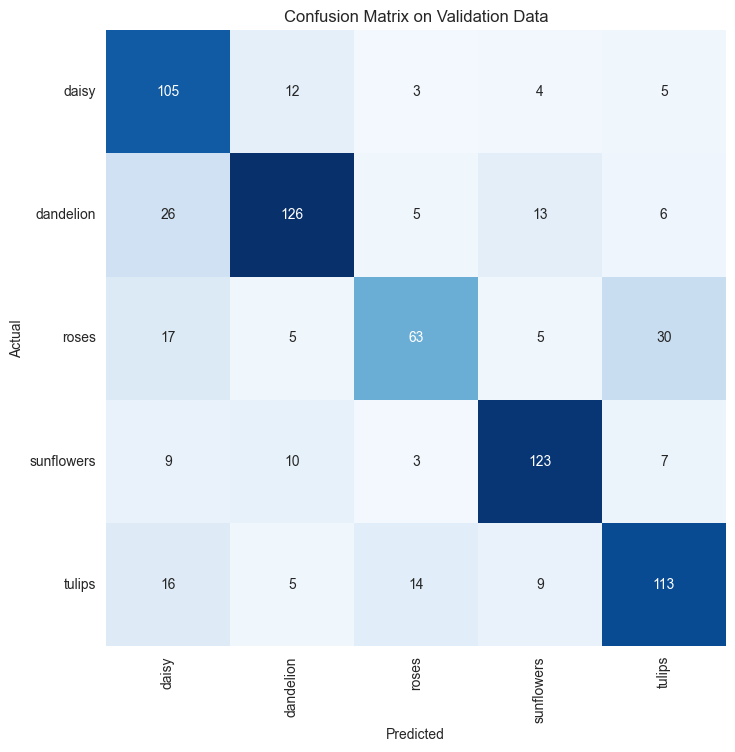

Classification Report:
----------------------
               precision    recall  f1-score   support

       daisy       0.61      0.81      0.70       129
   dandelion       0.80      0.72      0.75       176
       roses       0.72      0.53      0.61       120
  sunflowers       0.80      0.81      0.80       152
      tulips       0.70      0.72      0.71       157

    accuracy                           0.72       734
   macro avg       0.72      0.72      0.71       734
weighted avg       0.73      0.72      0.72       734



In [97]:
# Previous version of Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
# Should be "test_ds" instead of validation data
classes=class_names # ordered list of class names
ytrue=[]
for images, label in val_ds:   
    for e in label:
        ytrue.append(classes[e]) # list of class names associated with each image file in test dataset 
ypred=[]
errors=0
count=0
preds=drop_model.predict(val_ds, verbose=1) # predict on the test data
for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=classes[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 
ypred=np.array(ypred)
ytrue=np.array(ytrue)
if len(classes)<= 30: # if more than 30 classes plot is not useful to cramed
        # create a confusion matrix 
        cm = confusion_matrix(ytrue, ypred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data")
        plt.show()
clr = classification_report(ytrue, ypred, target_names=class_names)
print("Classification Report:\n----------------------\n", clr) 